## 任务3:    依据时间序列，预测最有可能成为高价值客户的TOP5，结果保存

## “居民客户的用电缴费习惯分析 3.csv”

### 1.1 导入相关python库

In [24]:
import pandas as pd
import matplotlib.pyplot as plt  
from datetime import datetime   #数据索引改为时间
import numpy as np
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

### 2.1  数据来源

数据来源于中国软件杯官网A5-电力客户行为分析 http://www.cnsoftbei.com/plus/view.php?aid=715
测试数据或平台部分所提供的测试数据：cph.xlsx 将其改名为电力1.xlsx后放入jupyter进行分析

### 3.1 数据预处理

将时间分为12个时间间隔种类，分别求出用户在各个时间间隔种类下的平均次数和平均金额标准化后按1：1的权重求出一个映射后汇总在一张表中

In [ ]:
import pandas as pd
import numpy as np
import datetime


# data=pd.read_csv('data1.csv').iloc[:,:]
# for i in range(len(data['用户编号'])):
#     data['用户编号'][i]-=1000000000

# 各个用户的编号
data=pd.read_csv('aaa.csv').iloc[:,:]
person=data['用户编号'].drop_duplicates().tolist()
# print(person)

for T in range(2,13):
# 最后的总列表
    persons=[]
    for i in person:
        persons.append(list(str(i).split()))
    for i in range(len(persons)):
        persons[i].append(0)
    for j in persons:
        for index,i in data.iterrows():
            if str(i[0])==j[0]:
                j[1]+=1
    # print(persons)

    # 初始化平均金额
    for i in persons:
        i.append(0)

    # 各个用户的第一次缴费时间
    t=[[] for i in range(len(person))]
    b=[0 for i in range(len(person))]
    for index,i in data.iterrows():
        for j in person:
            if b[j-1]==0 and i[0]==j:
                t[j-1].append(i[1])
                b[j - 1] = 1
                break
    # print(t)

    # 各个用户总的缴费区间
    # T=2
    for j in t:
        ymd=list(map(int,(j[0].split('/'))))
        d1=datetime.date(ymd[0],ymd[1],ymd[2])
        while d1.__le__(datetime.date(2019,3,31)):
            ymd[0] = ymd[0] if ymd[1] + T <= 12 else ymd[0] + 1
            ymd[1] = ymd[1] + T if ymd[1] + T<=12 else ymd[1] + T-12
            j.append(str(ymd[0]) + '/' + str(ymd[1]) + '/' + str(ymd[2]))
            d1 = datetime.date(ymd[0], ymd[1], ymd[2])
    # print(t)

    for i in range(len(persons)):
        # m=[0 for i in range(len(t[i]) - 1)]
        # n=[0 for i in range(len(t[i]) - 1)]
        t1,m1=[],[]
        for j in range(len(t[i])-1):
            ymd_begin = list(map(int, (t[i][j].split('/'))))
            ymd_end = list(map(int, (t[i][j + 1].split('/'))))
            d_begin = datetime.date(ymd_begin[0], ymd_begin[1], ymd_begin[2])
            d_end = datetime.date(ymd_end[0], ymd_end[1], ymd_end[2])
            t2,m2=[],[]
            for index,k in data.iterrows():
                if i+1==k[0]:
                    ymd = list(map(int, (k[1].split('/'))))
                    d1 = datetime.date(ymd[0], ymd[1], ymd[2])
                    if d1.__lt__(d_end) and d1.__ge__(d_begin):
                        t2.append(k[1])
                        m2.append(k[2])
                        # m[j] += 1
                        # n[j] += k[2]
            if t2:
                persons[i][2]=persons[i][2]+sum(m2)/len(m2)
                t1.append(t2)
        persons[i][1]=round(persons[i][1]/len(t1),3)
        persons[i][2]=round(persons[i][2]/len(t1),3)
    print(persons)

    names=['用户编号','平均缴费次数','平均缴费金额']
    persons=pd.DataFrame(data=persons,columns=names)
    print(persons)
    persons.to_csv('T='+str(T)+'.csv',index=False,encoding='utf-8-sig')

In [19]:
#对比原来的占比
#读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
data = pd.read_csv('用户价值分类2 .csv', index_col = 'ds')
data = pd.DataFrame(data,dtype=np.float64)

### 4.1 对用户1进行分析

In [20]:
data=data.iloc[:,0:1] #提取用户1的时间序列分析
data.head()

y1
ds                
2019/2/1  0.756950
2019/3/1  2.078763
2019/4/1  1.756804
2019/5/1  2.237002
2019/6/1  1.391166

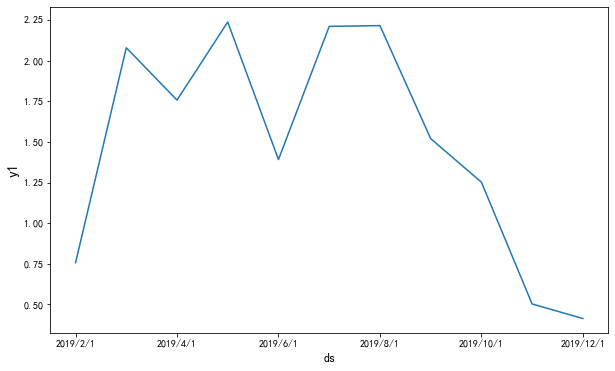

In [21]:
#时序图
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
data["y1"].plot()
plt.xlabel('ds',fontsize=12,verticalalignment='top')
plt.ylabel('y1',fontsize=14,horizontalalignment='center')
plt.show()

预测后一个时间间隔种类下的用户得分

In [25]:
data = pd.read_csv(r'C:\Users\15317\jupyter\用户分组\用户1.csv', index_col = 'ds')
data = pd.DataFrame(data,dtype=np.float64)
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)
a=yhat
# pre = model.forecast(1)[0]
# print("pre:",pre)

2020-01-01    0.334291
Freq: MS, dtype: float64


将其导入到此用户下的数据得分，在预测下一个，如此循环直到得到每个用户得分的三个预测值

### 5.1 对全部用户进行操作 

接下来进行批处理

In [ ]:
for i in range(100):
    i=i+1
    data = pd.read_csv(f'C:\\Users\\15317\\jupyter\\用户分组\\用户{i}.csv', index_col = 'ds')
    data = pd.DataFrame(data,dtype=np.float64)
    # ARIMA example
    from statsmodels.tsa.arima.model import ARIMA
    from random import random
    # contrived dataset
    # fit model
    model = ARIMA(data, order=(1, 1, 1))
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data), typ='levels')
    print(yhat)
    a=yhat


    #时序图
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
    data[f"y{i}"].plot()
    plt.xlabel('ds',fontsize=12,verticalalignment='top')
    plt.ylabel(f'y{i}',fontsize=14,horizontalalignment='center')
    plt.savefig(f"E:\\new时间预测\\用户{i}时序图.jpg",dpi=300)

    data = pd.read_csv(f'C:\\Users\\15317\\jupyter\\用户分组\\用户{i}.csv')
    data['ds'].tolist()
    temp_list = str(a).split()
    add_time = temp_list[0].replace('-','/')
    add_y_1_hat = float(temp_list[1])
    series_add_DF = pd.Series({'ds':f'{add_time}',f'y{i}':add_y_1_hat},name=len(data))
    data=data.append(series_add_DF)
    data.to_csv(f'E:\\new时间预测\\用户{i}时间序列预测.csv',index=False)

    for h in range(2):
        data = pd.read_csv(f'E:\\new时间预测\\用户{i}时间序列预测.csv', index_col = 'ds')
        data = pd.DataFrame(data,dtype=np.float64)
        # ARIMA example
        from statsmodels.tsa.arima.model import ARIMA
        from random import random
        # contrived dataset
        # fit model
        model = ARIMA(data, order=(1, 1, 1))
        model_fit = model.fit()
        # make prediction
        yhat = model_fit.predict(len(data), len(data), typ='levels')
        print(yhat)
        a=yhat

        data = pd.read_csv(f'E:\\new时间预测\\用户{i}时间序列预测.csv')
        data['ds'].tolist()
        temp_list = str(a).split()
        add_time = temp_list[0].replace('-','/')
        add_y_1_hat = float(temp_list[1])
        series_add_DF = pd.Series({'ds':f'{add_time}',f'y{i}':add_y_1_hat},name=len(data))
        data=data.append(series_add_DF)
        data.to_csv(f'E:\\new时间预测\\用户{i}时间序列预测.csv',index=False)


结果如下
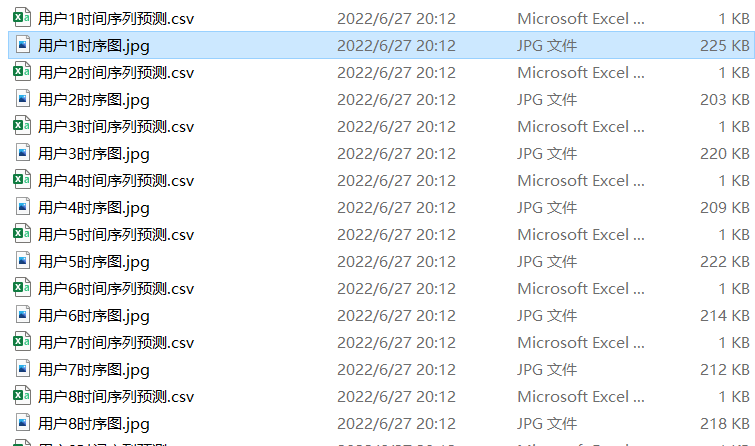

将其汇总到一张表，结果如下:


In [29]:
a=pd.read_csv(r'E:\downloads\中国电力统计年鉴2020\用户总体时间序列预测.csv')
a.head()

ds      y100       y99       y98       y97       y96       y95  \
0  2019/2/1  0.443105  0.771415 -0.094929  0.884667  0.273202  0.795510   
1  2019/3/1  1.191198  2.310657  1.277739 -1.764485  0.880752  1.748174   
2  2019/4/1  1.378777  0.135397  2.308467 -1.319480  1.227340  1.822272   
3  2019/5/1  1.612251  0.353167 -0.390147 -1.016190  1.320420  1.976410   
4  2019/6/1  1.391623  0.360459  2.902202 -0.786774  1.248541  1.924517   

        y94       y93       y92  ...       y10        y9        y8        y7  \
0  0.761325 -1.412043 -1.761496  ... -0.127190  1.975811  2.482393  2.831142   
1  1.078004  1.927138 -0.245957  ...  1.585702  1.300767  1.802959  2.423851   
2  1.522423 -0.977092 -2.449850  ...  1.489972  1.506763  1.854722  2.417203   
3 -0.988758  0.313319  2.121789  ...  1.425130  1.694547  2.355565  2.572552   
4  2.095445 -0.122802  1.222120  ...  1.198703  1.465651  1.741956  2.501819   

         y6        y5        y4        y3        y2        y1  
0  2.078625  5.308990  0.639382  3.106458 -2.407587  0.756950  
1  1.551863  4.382399  0.394137  2.830170 -1.643904  2.078763  
2  1.775413  4.786110  0.408279  3.019360 -1.433624  1.756804  
3  1.983908  5.101734  0.403724  3.106332 -1.233724  2.237002  
4  1.455792  4.268274 -0.218618  2.886702 -1.504745  1.391166  

[5 rows x 101 columns]

### 6.1 依据时间序列T=12,13,14时，选取最有可能成为高价值客户的TOP5

根据数据T=12,13,14下时用户得分，获得最高分的用户分别为：
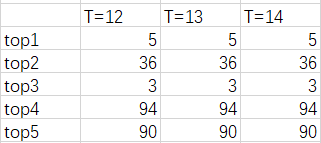

### 7.1 总结

依据时间序列，预测最有可能成为高价值客户的TOP5为：
- **Top1：用户5,**
- **Top2：用户36,**
- **Top3：用户3,**
- **Top4：用户94,**
- **Top5：用户90**